Among the 112,342 cited works which had enough history in Web of Science to ask about rebirth and at least 1 citation per year, only 80 died and were reborn.

# User Settings

In [1]:
database_name = 'sociology-wos'

# general imports

In [2]:
import sys; sys.path.append(_dh[0].split("knowknow")[0])
from knowknow import *

In [3]:
ysum = load_variable("%s.c.ysum" % database_name)

# visualize histories

In [4]:
list(ysum.values())[0]

{'death_1': None,
 'rebirth_5_3': None,
 'rebirth_5_10': None,
 'rebirth_5_20': None,
 'maxcount': 21,
 'totalprop': 0.23227683222431336,
 'first': 1976,
 'death_2': None,
 'rebirth_1_10': None,
 'maxprop': 0.01728395061728395,
 'last': 2019,
 'rebirth_5_2': None,
 'rebirth_5_5': None,
 'rebirth_3_20': None,
 'name': 'Andrews, F.|social indicators we',
 'rebirth_5_1': None,
 'rebirth_3_5': None,
 'rebirth_3_10': None,
 'rebirth_5_0': None,
 'rebirth_5_4': None,
 'rebirth_0_10': None,
 'death_3': None,
 'rebirth_5_6': None,
 'rebirth_1_20': None,
 'rebirth_5_8': None,
 'rebirth_5_7': None,
 'rebirth_3_3': None,
 'rebirth_0_20': None,
 'rebirth_0_3': None,
 'death_0': None,
 'maxcounty': 1984,
 'death_5': None,
 'rebirth_2_5': None,
 'rebirth_5_9': None,
 'type': 'book',
 'total': 361,
 'rebirth_1_3': None,
 'rebirth_2_20': None,
 'rebirth_2_10': None,
 'maxpropy': 1984,
 'rebirth_1_5': None,
 'pub': 1976,
 'rebirth_0_5': None,
 'rebirth_2_3': None}

In [11]:
big_rebirth_names

['Becker, H.|1957|hum organ,v16,p28']

In [21]:
big_rebirth_names = [
    x['name']
    for x in ysum.values()
    if all( x[y] is not None for y in dfilt )
]

In [95]:
big_rebirth_names = [
    x['name']
    for x in ysum.values()
    if x['rebirth_1_10'] is not None
    and x['total'] >= 20
]

In [90]:
dfilt = ['rebirth_1_10']
dprint = ['rebirth_1_10', 'death_0', 'death_3', 'death_5']

In [91]:
shuffle(big_rebirth_names)

In [97]:
big_rebirth_names = sorted( big_rebirth_names, key=lambda x:-ysum[x]['total'] )

In [96]:
len(big_rebirth_names)

12

NUM_REBIRTHS: 12
Loaded keys: dict_keys(['c.fy', 'fy'])
Available keys: ['a', 'c', 'c.c', 'c.fj', 'c.fy', 'c.fy.j', 'fa', 'fa.c', 'fa.fj', 'fa.fj.fy', 'fa.fy', 'fj', 'fj.fy', 'fj.ta', 'fj.ty', 'fy', 'fy.ta', 'fy.ty', 'ta', 'ty', 'ty.ty']
Richard, N.|social sources denom
Hughes, E.|1937|am j sociol,v43,p404
Mead, M.|cooperation competit
Mayo, E.|social problems ind
Key, J.|so politics
Whyte, W.|organization man


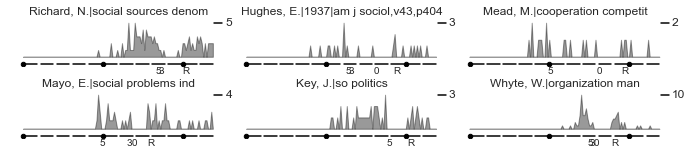

Becker, H.|1957|hum organ,v16,p28
Hollander, E.|1958|psychol rev,v65,p117
Kohn, M.|1963|am j sociol,v68,p471
Goode, E.|drugs am soc
Campbell, A.|quality am life 1978
Taylor, P.|1976|am sociol rev,v41,p484


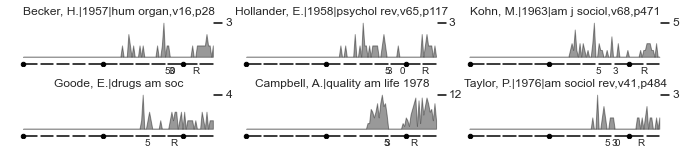

In [98]:
print("NUM_REBIRTHS:", len(big_rebirth_names))

def get_name(x):
    sp = x.split("_")
    if len(sp) == 2: # death
        return sp[-1]
    if len(sp) == 3:
        return "R"# % sp[-1]

plot_count_series( 
    sorted( big_rebirth_names[:30], key=lambda x:ysum[x]['pub'] ), 
    database=database_name,
    myname="rebirth 1-10 (%s, %s)" % ('c',database_name), 
    overwrite=True,
    cols=3,
    markers={
        name: {
            ysum[name][x]: get_name(x)
            for x in dprint
            if ysum[name][x] is not None
        }
        for name in big_rebirth_names[:30]
    }
)

In [23]:
dfilt = ['rebirth_1_10']

In [29]:
rbnames = [
    x['name']
    for x in ysum.values()
    if all( x[y] is not None for y in dfilt ) and
    x['total'] >= 10
]

In [30]:
len(rbnames)

37

In [31]:
rbnames = sorted(rbnames, key=lambda x:-ysum[x]['total'])

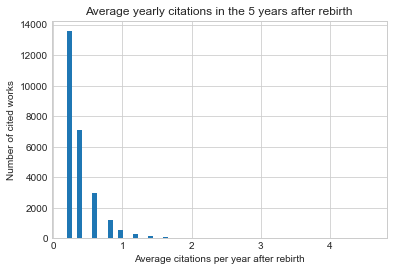

In [8]:
cb.aft.hist(bins=60)
plt.title("Average yearly citations in the 5 years after rebirth");
plt.ylabel("Number of cited works")
plt.xlabel("Average citations per year after rebirth");

# overall patterns

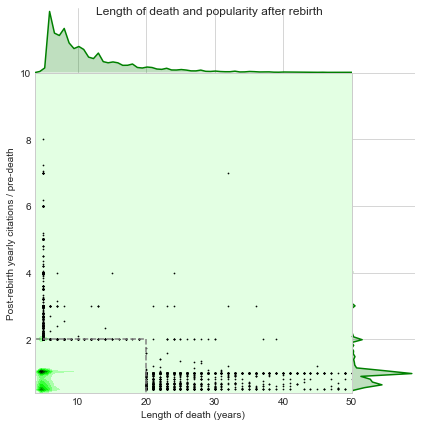

In [9]:
YMAX=2
XMAX=20

def myscatter(*args, **kwargs):
    kwargs['s'] = 0.5
    kwargs['color'] = 'black'
    kwargs['alpha'] = 1
    
    filt = np.logical_or( 
        args[0] >= XMAX,
        args[1] >= YMAX
    )
    
    args = (
        args[0][filt],
        args[1][filt]
    )
    plt.scatter(*args, **kwargs)
    plt.vlines(XMAX,YMAX,plt.ylim()[0], linestyle='--', color='gray')
    plt.hlines(YMAX,plt.xlim()[0],XMAX, linestyle='--', color='gray')

g = sns.jointplot('dlen','rat',cb, kind="kde", space=0, color="g")
g.plot_joint(myscatter)

plt.xlabel("Length of death (years)")
plt.ylabel("Post-rebirth yearly citations / pre-death")
g.fig.suptitle('Length of death and popularity after rebirth');

plt.xlim(plt.xlim()[0],50)
plt.ylim(plt.ylim()[0],10)

save_figure("%s.deathLengthAndRebirthSize" % database_name)

(0.5, 3.0)

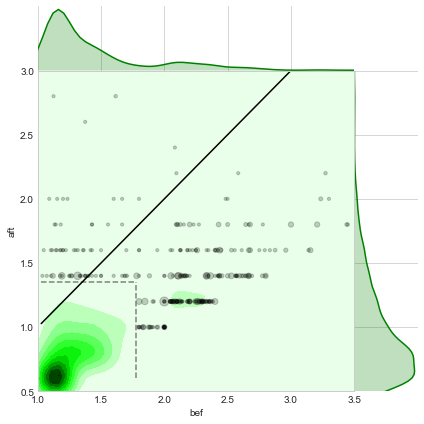

In [21]:
legend_pos = (4,0.8)

toplot = cb[(cb.bef>1)]

YBOX = 0.75
XBOX = 0.75

def myscatter(*args, **kwargs):
    kwargs['color'] = 'black'
    kwargs['alpha'] = 0.2
    
    
    mx = args[0].min()
    my = args[1].min()
    mxy = max(mx,my)
    
    plt.plot([mxy,3.5],[mxy,3.5],color='black');
    plt.vlines(mx+XBOX, my,my+YBOX, linestyle='--', color='gray')
    plt.hlines(my+YBOX, mx,mx+XBOX, linestyle='--', color='gray')
    
    
    
    filt = np.logical_or( 
        args[0] > mx+XBOX,
        args[1] > my+YBOX
    )
    
    args = (
        args[0][filt],
        args[1][filt]
    )
    
    kwargs['s'] = (toplot[filt].dlen * 2)
    
    plt.scatter(*args, **kwargs)
    
    if False:
        # my attempt at a legend

        plt.scatter(
            [4]*6,
            np.linspace(2.5,1,6),
            s= [x*2 for x in range(5,50,5)][:6],
            color='black',
            alpha=0.2
        )

        for i,x in enumerate(range(5,5+5*6,5)):
            # this method is called for each point
            plt.annotate("%s years dead" % x, # this is the text
                         (4,np.linspace(2.5,1,6)[i]), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
        bbox = []

        rect = plt.Rectangle((legend_pos[0]-0.7,legend_pos[1]),
                          1.4,
                          2.1, fill=False,
                          edgecolor='black', linewidth=2.5)
        plt.ylim(0.5,4.5)
        plt.gca().add_patch(rect)
        
g = sns.jointplot('bef','aft',toplot, kind="kde", space=0, color="g")
g.plot_joint(myscatter);
plt.xlim(1,3.5)
plt.ylim(0.5,3)

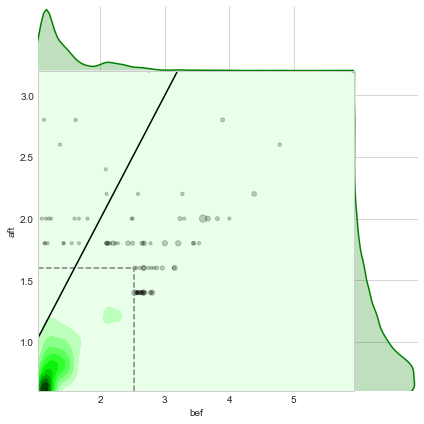

In [31]:
legend_pos = (4,0.8)

toplot = cb[(cb.bef>1)]

YBOX = 1
XBOX = 1.5

def myscatter(*args, **kwargs):
    kwargs['color'] = 'black'
    kwargs['alpha'] = 0.2
    
    
    mx = args[0].min()
    my = args[1].min()
    mxy = max(mx,my)
    
    plt.plot([mxy,3.5],[mxy,3.5],color='black');
    plt.vlines(mx+XBOX, my,my+YBOX, linestyle='--', color='gray')
    plt.hlines(my+YBOX, mx,mx+XBOX, linestyle='--', color='gray')
    
    
    
    filt = np.logical_or( 
        args[0] > mx+XBOX,
        args[1] > my+YBOX
    )
    
    args = (
        args[0][filt],
        args[1][filt]
    )
    
    kwargs['s'] = (toplot[filt].dlen * 2)
    
    plt.scatter(*args, **kwargs)
    
    if False:
        # my attempt at a legend

        plt.scatter(
            [4]*6,
            np.linspace(2.5,1,6),
            s= [x*2 for x in range(5,50,5)][:6],
            color='black',
            alpha=0.2
        )

        for i,x in enumerate(range(5,5+5*6,5)):
            # this method is called for each point
            plt.annotate("%s years dead" % x, # this is the text
                         (4,np.linspace(2.5,1,6)[i]), # this is the point to label
                         textcoords="offset points", # how to position the text
                         xytext=(0,10), # distance from text to points (x,y)
                         ha='center')
        bbox = []

        rect = plt.Rectangle((legend_pos[0]-0.7,legend_pos[1]),
                          1.4,
                          2.1, fill=False,
                          edgecolor='black', linewidth=2.5)
        plt.ylim(0.5,4.5)
        plt.gca().add_patch(rect)
        
g = sns.jointplot('bef','aft',toplot, kind="kde", space=0, color="g")
g.plot_joint(myscatter);
plt.ylim(toplot.aft.min(),toplot.aft.max());
plt.xlim(toplot.bef.min(),toplot.bef.max());